# BEATS KBLT tomopy recon test 02
#### Reconstruction of CONTINUOUS SCAN - KBLT dataset roman glass 01 <br />
Author: [Gianluca Iori](mailto:gianluca.iori@sesame.org.jo)<br />
Created on: 06-11-2020 <br />
Modified on: 03-11-2022 <br />

see also:
https://tomopy.readthedocs.io/en/latest/ipynb/tomopy.html

#### Activate TomoPy kernel in Jupyter:
`conda env list`

`source activate tomopy`

`python -m ipykernel install --user --name tomopy_source --display-name "conda (tomopy_source)"`

`jupyter notebook &`

In [1]:
%%html
<style>
table {float:left}
</style>

In [2]:
import os
import dxchange
import tomopy
import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt
# import recon_utils

astropy module not found
olefile module not found


In [3]:
matplotlib.rcParams['figure.dpi'] = 150

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

In [5]:
# BL-BEATS-WS01
h5file = "/mnt/DAQ_Data/kblt_roman_glass_01-20221103T120154/kblt_roman_glass_01-20221103T120154.h5"
h5file_flats = "/mnt/DAQ_Data/kblt_roman_glass_01_flats-20221103T120539/kblt_roman_glass_01_flats-20221103T120539.h5"
h5file_darks = "/mnt/DAQ_Data/kblt_roman_glass_01_darks-20221103T120621/kblt_roman_glass_01_darks-20221103T120621.h5"
path_recon = "/home/beats/Data/kblt/roman_glass_01/recon/"

#### Read HDF5 data
- The `.read_aps_32id()` method of DXchange can read TOMCAT .h5 data
- If run without arguments (proj..), the import seem to be virtual (mem map)? I don't see this data in the RAM and I can reconstruct the whole volume on my laptop

In [6]:
# read the projections
projs, flats, darks, theta = dxchange.read_aps_32id(h5file, exchange_rank=0)

INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01-20221103T120154/kblt_roman_glass_01-20221103T120154.h5
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01-20221103T120154/kblt_roman_glass_01-20221103T120154.h5
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01-20221103T120154/kblt_roman_glass_01-20221103T120154.h5
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01-20221103T120154/kblt_roman_glass_01-20221103T120154.h5
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01-20221103T120154/kblt_roman_glass_01-20221103T120154.h5
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01-20221103T120154/kblt_roman_glass_01-20221103T120154.h5


In [7]:
print(projs.shape[:])
print(projs.dtype)

(999, 1400, 880)
uint16


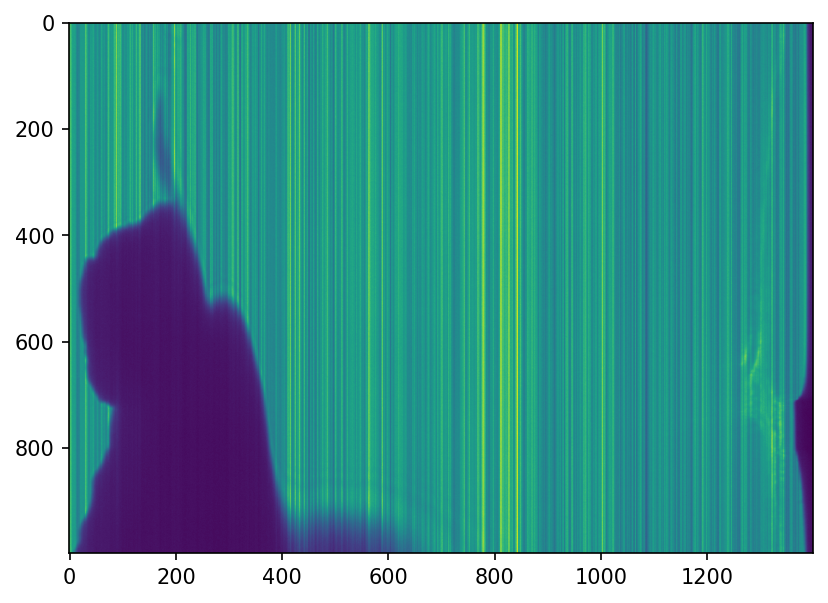

In [129]:
plt.imshow(projs[:, :, 215])
plt.show()

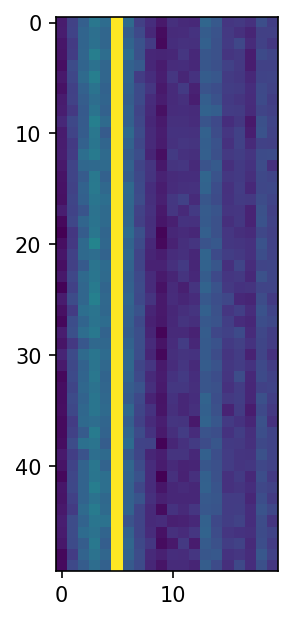

In [130]:
plt.imshow(projs[200:250, 844, 210:230])
plt.show()

In [131]:
np.max(projs)

65485

Check if theta exists

In [16]:
theta/np.pi*180

array([  0.       ,   0.36     ,   0.72     ,   1.08     ,   1.44     ,
         1.7999998,   2.16     ,   2.52     ,   2.88     ,   3.2399998,
         3.5999997,   3.9599996,   4.32     ,   4.68     ,   5.04     ,
         5.4      ,   5.76     ,   6.12     ,   6.4799995,   6.8400006,
         7.1999993,   7.56     ,   7.919999 ,   8.28     ,   8.64     ,
         9.       ,   9.36     ,   9.72     ,  10.08     ,  10.439999 ,
        10.8      ,  11.159999 ,  11.52     ,  11.88     ,  12.24     ,
        12.6      ,  12.959999 ,  13.319999 ,  13.680001 ,  14.04     ,
        14.399999 ,  14.759999 ,  15.12     ,  15.479998 ,  15.839998 ,
        16.2      ,  16.56     ,  16.92     ,  17.28     ,  17.64     ,
        18.       ,  18.36     ,  18.72     ,  19.08     ,  19.44     ,
        19.8      ,  20.16     ,  20.52     ,  20.879997 ,  21.239998 ,
        21.6      ,  21.96     ,  22.319998 ,  22.68     ,  23.04     ,
        23.4      ,  23.76     ,  24.12     ,  24.48     ,  24.8

If the angular information is not avaialable from the raw data you need to set the data collection angles. In this case, theta is set as equally spaced between 0-180 degrees.

In [12]:
if theta is None:
    theta = tomopy.angles(projs.shape[0])

#### Read additional theta array from encoder readout

In [7]:
theta_readout = dxchange.read_hdf5(h5file, '/exchange/theta_readout')

INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01-20221103T120154/kblt_roman_glass_01-20221103T120154.h5


In [10]:
print(theta_readout)

[  0.9938   1.3352   1.3352   1.684    1.684    2.0256   2.0256   2.3732
   2.3732   2.719    2.719    3.0582   3.0582   3.4084   3.4084   3.751
   3.751    4.0956   4.0956   4.444    4.444    4.7826   5.13     5.13
   5.4736   5.4736   5.817    5.817    6.1682   6.1682   6.511    6.511
   6.8544   6.8544   7.2032   7.2032   7.544    7.544    7.8932   7.8932
   8.2412   8.2412   8.5804   8.9316   8.9316   9.2778   9.2778   9.6218
   9.6218   9.9706   9.9706  10.311   10.311   10.6556  10.6556  11.0068
  11.0068  11.3486  11.3486  11.6958  11.6958  12.0442  12.0442  12.3874
  12.3874  12.7352  13.0854  13.0854  13.4258  13.4258  13.774   13.774
  14.1198  14.1198  14.4638  14.4638  14.8136  14.8136  15.1624  15.1624
  15.5052  15.5052  15.853   15.853   16.201   16.201   16.5438  16.5438
  16.894   16.894   17.2424  17.5844  17.5844  17.9342  17.9342  18.2846
  18.2846  18.6274  18.6274  18.9742  18.9742  19.322   19.322   19.6644
  19.6644  20.0138  20.0138  20.3632  20.3632  20.7042  

#### Read flats and darks from another scan
We forgot to colelct flats and darks! Flats and darks are taken from a previous scan (separate files) and need to be cropped to the same ROI

In [8]:
# read the flats
tmp, flats, tmp2, tmp3 = dxchange.read_aps_32id(h5file_flats)

INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01_flats-20221103T120539/kblt_roman_glass_01_flats-20221103T120539.h5
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01_flats-20221103T120539/kblt_roman_glass_01_flats-20221103T120539.h5
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01_flats-20221103T120539/kblt_roman_glass_01_flats-20221103T120539.h5
ERROR:dxchange.reader:Unrecognized hdf5 dataset: "exchange/theta"
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01_flats-20221103T120539/kblt_roman_glass_01_flats-20221103T120539.h5
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01_flats-20221103T120539/kblt_roman_glass_01_flats-20221103T120539.h5
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01_flats-20221103T120539/kblt_roman_glass_01_flats-20221103T120539.h5
INFO:dxchange.reader:Data successf

In [12]:
print(flats.shape[:])

(20, 1400, 880)


In [9]:
# read the darks
tmp, tmp2, darks, tmp3 = dxchange.read_aps_32id(h5file_darks)

INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01_darks-20221103T120621/kblt_roman_glass_01_darks-20221103T120621.h5
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01_darks-20221103T120621/kblt_roman_glass_01_darks-20221103T120621.h5
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01_darks-20221103T120621/kblt_roman_glass_01_darks-20221103T120621.h5
ERROR:dxchange.reader:Unrecognized hdf5 dataset: "exchange/theta"
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01_darks-20221103T120621/kblt_roman_glass_01_darks-20221103T120621.h5
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01_darks-20221103T120621/kblt_roman_glass_01_darks-20221103T120621.h5
INFO:dxchange.reader:Data successfully imported: /mnt/DAQ_Data/kblt_roman_glass_01_darks-20221103T120621/kblt_roman_glass_01_darks-20221103T120621.h5
INFO:dxchange.reader:Data successf

In [14]:
print(darks.shape[:])

(20, 1400, 880)


## Flat field correction

In [182]:
projs_corr = tomopy.normalize(projs, flats, darks, ncore=36)
# print(projs.dtype)

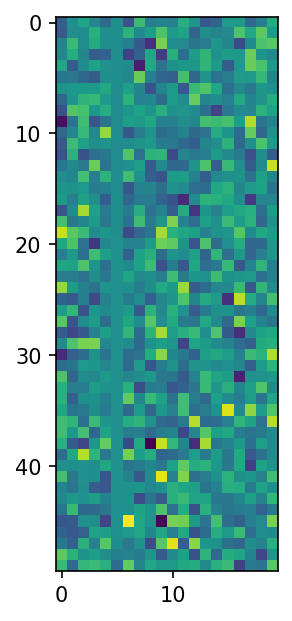

In [200]:
plt.imshow(projs_corr[200:250, 844, 210:230])
plt.show()

In [199]:
projs_corr[200, 844, 215]

-0.040817723

## Stripe removal
`tomopy.prep.stripe.remove_all_stripe(tomo, snr=3, la_size=61, sm_size=21, dim=1, ncore=None, nchunk=None)`

https://tomopy.readthedocs.io/en/latest/api/tomopy.prep.stripe.html#tomopy.prep.stripe.remove_all_stripe

In [184]:
projs_corr = tomopy.prep.stripe.remove_dead_stripe(projs_corr, ncore=24)

/home/beats/.conda/envs/tomopy-source/lib/python3.7/site-packages/tomopy/prep/stripe.py:724: RuntimeWarning: invalid value encountered in true_divide
  sinogram = sinogram / matfact


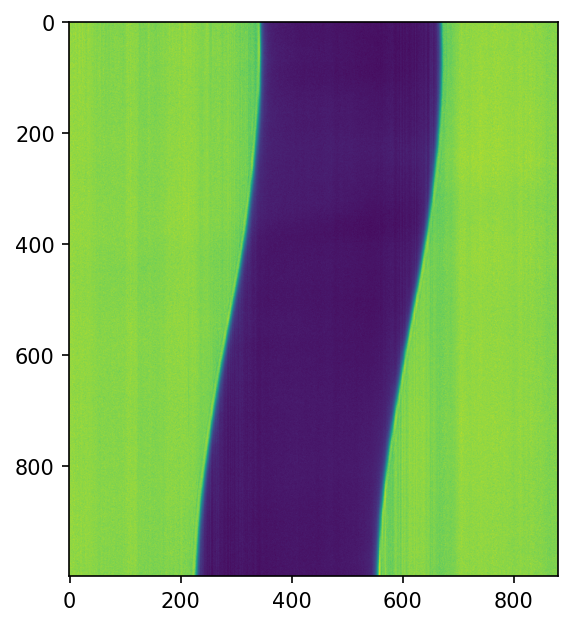

In [185]:
plt.imshow(projs_corr[:, 844, :])
plt.show()

#### Calculate $ -log(projs) $ to linearize transmission tomography data.

In [186]:
projs_corr = tomopy.minus_log(projs_corr)

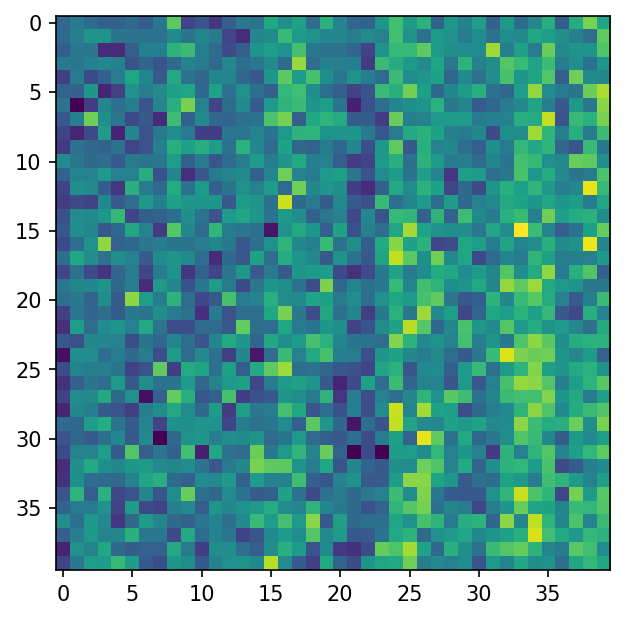

In [211]:
plt.imshow(projs_corr[280:320, 700, 280:320])
plt.show()

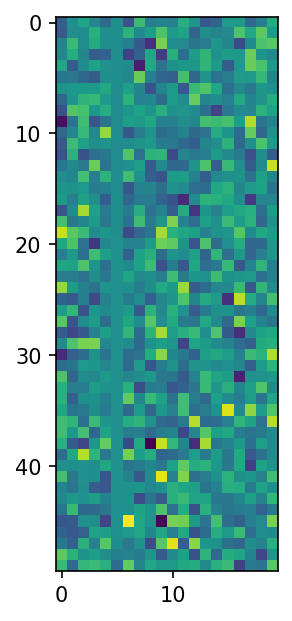

In [198]:
plt.imshow(projs_corr[200:250, 844, 210:230])
plt.show()

#### Automatic detect Center Of Rotation (COR)

In [169]:
COR = tomopy.find_center_vo(projs_corr)
print(COR)

449.25


In [ ]:
COR = tomopy.find_center(projs_crop_corr, theta, init=projs_crop_corr.shape[2]/2, ind=1000, tol=0.5)
print(COR)

In [36]:
del recon

#### Save images reconstructed with a range of rotation centers

In [26]:
path_test = "/home/beats/Data/kblt/roman_glass_01/test/"

In [29]:
tomopy.write_center(projs_corr, theta, path_test, [450, 460, 1])

INFO:tomopy.recon.algorithm:Reconstructing 10 slice groups with 10 master threads...


The Center Of Rotation is 449

In [34]:
COR = 449

#### Reconstruction with CPU
|  |  |
| :--- | :--- |
| **Algorithm**      | `gridrec` |

In [14]:
recon = tomopy.recon(projs_corr, theta, center=COR, algorithm='gridrec', sinogram_order=False)

INFO:tomopy.recon.algorithm:Reconstructing 36 slice groups with 36 master threads...


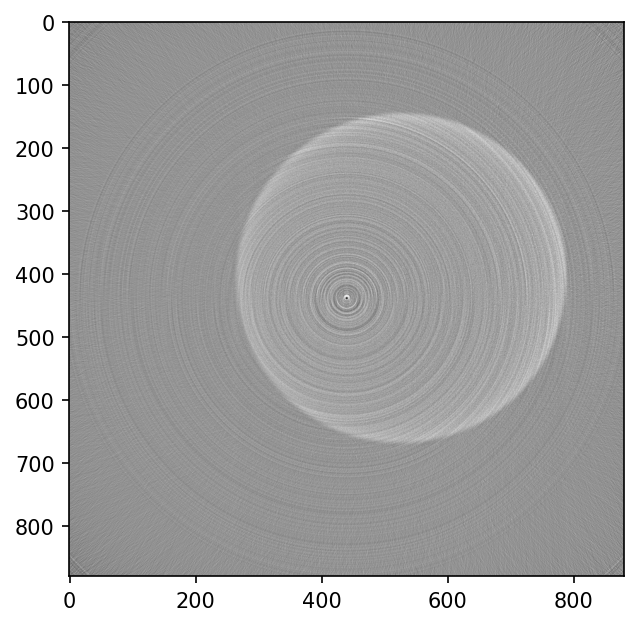

In [15]:
plt.imshow(recon[300, :, :], cmap='gray')
plt.show()

In [32]:
recon.dtype

dtype('float32')

___
#### Reconstruction with GPU
|  |  |
| :--- | :--- |
| **Algorithm**      | `sirt` |

In [ ]:
recon_gpu = tomopy.recon(projs_corr, theta, center=COR, accelerated=True, algorithm='mlem', sinogram_order=False)

**tomopy GPU recon goes Out of Memory**

___
#### Reconstruction with ASTRA
|  |  |
| :--- | :--- |
| **Algorithm**      | `FBP` |

In [17]:
options = {'proj_type': 'linear', 'method': 'FBP'}

In [18]:
recon_fbp = tomopy.recon(projs_corr,
                         theta,
                         center=COR,
                         algorithm=tomopy.astra,
                         options=options,
                         ncore=36)

INFO:tomopy.recon.algorithm:Reconstructing 36 slice groups with 36 master threads...


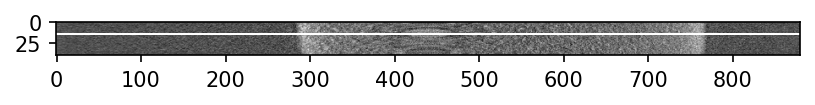

In [209]:
plt.imshow(recon_fbp[280:320, 300, :], cmap='gray')
plt.show()

___
#### Reconstruction with ASTRA-GPU
See all algorithms here: http://www.astra-toolbox.com/docs/algs/index.html

|  |  |
| :--- | :--- |
| **Algorithm**      | `FBP_CUDA` |


In [218]:
options = {'proj_type': 'cuda', 'method': 'FBP_CUDA'}

In [219]:
recon_gpu = tomopy.recon(projs_corr,
                         theta,
                         center=COR,
                         algorithm=tomopy.astra,
                         options=options,
                         ncore=2)

INFO:tomopy.recon.algorithm:Reconstructing 2 slice groups with 2 master threads...


#### Apply circular mask

In [179]:
recon_gpu = tomopy.circ_mask(recon_gpu, axis=0, ratio=0.92, val=-0.006)

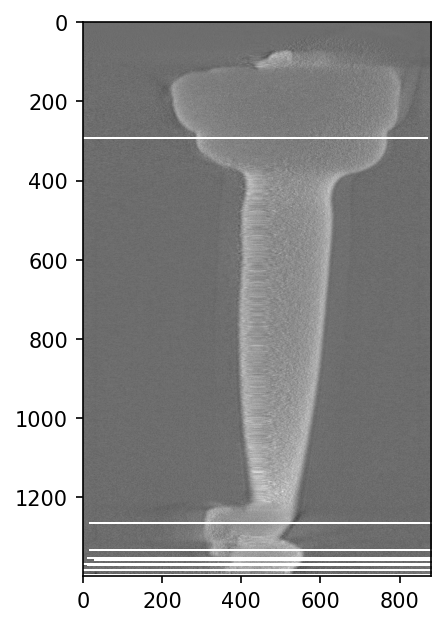

In [226]:
plt.imshow(recon_gpu_readout[:, 300, :], cmap='gray')
plt.show()

#### Reconstruction with astra-GPU; encoder theta readout

In [223]:
recon_gpu_readout = tomopy.recon(projs_corr,
                         np.pi*theta_readout/180,
                         center=COR,
                         algorithm=tomopy.astra,
                         options=options,
                         ncore=2)

INFO:tomopy.recon.algorithm:Reconstructing 2 slice groups with 2 master threads...


#### Ring artefact correction
Removes ring artefacts in the reconstruction domain

`tomopy.misc.corr.remove_ring(rec, center_x=None, center_y=None, thresh=300.0, thresh_max=300.0, thresh_min=-100.0, theta_min=30, rwidth=30, int_mode='WRAP', ncore=None, nchunk=None, out=None)`


In [34]:
recon_gpu_ring = tomopy.misc.corr.remove_ring(recon_gpu)

In [32]:
recon_gpu_readout_ring = tomopy.misc.corr.remove_ring(recon_gpu_readout,
                                                      center_x=None,
                                                      center_y=None,
                                                      thresh=300.0,
                                                      thresh_max=300.0,
                                                      thresh_min=-100.0,
                                                      theta_min=30,
                                                      rwidth=30,
                                                      int_mode='WRAP')

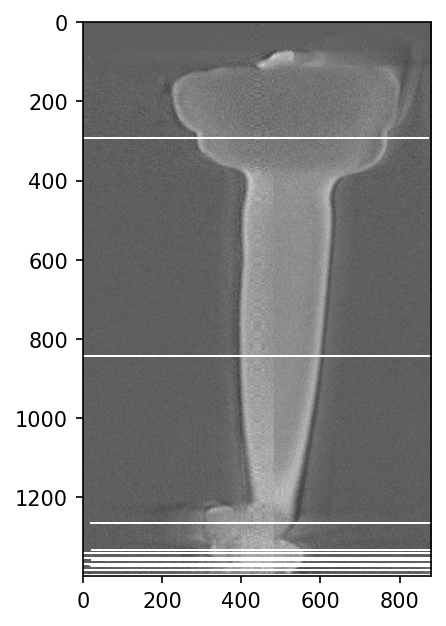

In [35]:
plt.imshow(recon_gpu_ring[:, 300, :], cmap='gray')
plt.show()

#### Apply circular mask

In [79]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95, val=-0.006)

#### Scale to 0-255 (`uint8`)
The uint8 GV range for output slices can cover the full float32 range or be selected based on the 3D data histogram

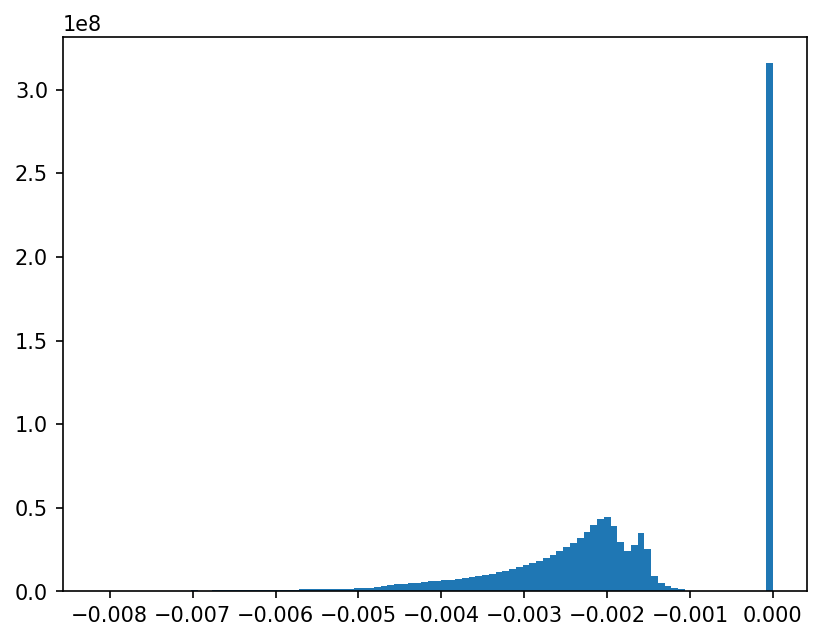

In [176]:
plt.hist(recon_gpu.ravel(), bins=100)
plt.show()

In [24]:
# uint8 GV range from data histogram (0.01 and 0.99 quantiles)
[range_min, q_95] = 1.1*np.quantile(recon.ravel(), [0.01, 0.99])
range_max = q_95 - range_min
print(range_min, range_max)

-0.006460846308618784 0.02500996766611934


In [51]:
# uint8 GV range as MIN and MAX of 3D data
range_min = np.nanmin(recon)
range_max = np.nanmax(recon)
range_max = range_max - range_min

In [52]:
recon_uint8Range = 255*((recon - range_min)/range_max)

In [53]:
recon_uint8Range[recon_uint8Range < 0] = 0

In [54]:
recon_uint8Range[recon_uint8Range > 255] = 255

In [30]:
# apply again circ mask
recon_uint8Range = tomopy.circ_mask(recon_uint8Range, axis=0, ratio=0.95)

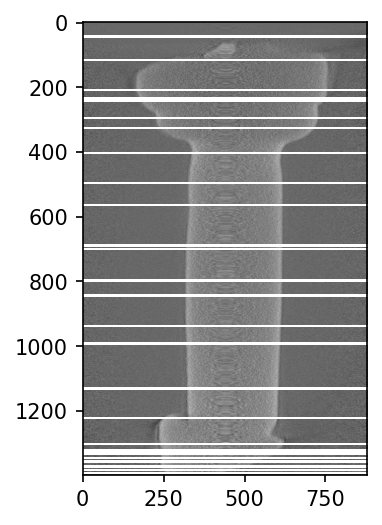

In [56]:
plt.imshow(recon_uint8Range[:, 300, :], cmap='gray')
plt.show()

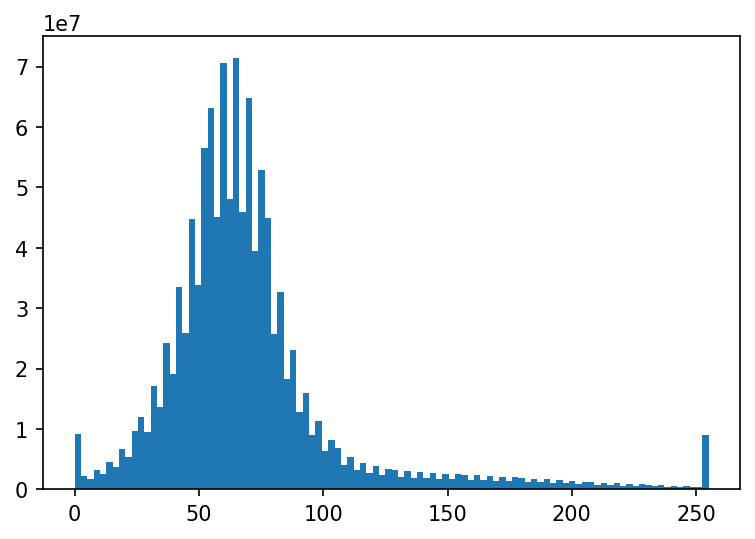

In [29]:
plt.hist(recon_uint8Range.round().ravel(), bins=100)
plt.show()

#### Write output Tiff stack as `uint8`

In [227]:
path_recon = "/home/beats/Data/kblt/roman_glass_01/recon_readout/"

In [228]:
fileout = path_recon+'slice.tiff'
dxchange.writer.write_tiff_stack(recon_gpu_readout, fname=fileout, axis=0, digit=4, start=0, overwrite=True)

In [30]:
fileout = path_recon+'kblt_roman_glass.tiff'
dxchange.writer.write_tiff_stack(recon_uint8Range, fname=fileout, dtype='uint8', axis=0, digit=5, start=0, overwrite=True)

#### Open virtual stack in ImageJ

In [19]:
os.system(Fiji_exe_stack + '/home/gianthk/Data/StefanFly_test/test_00_/rec_8bit_0/test_00_001.rec.8bit.tif &')

0

#### Save images reconstructed with a range of rotation centers.

In [35]:
tomopy.write_center(projs, theta, dpath=path_recon+'tmp/COR', cen_range=[COR-10, COR+10, 1], ind=500, mask=True, ratio=1.0, algorithm='gridrec', filter_name='parzen')

Reconstructing 20 slice groups with 8 master threads...


View them in Fiji

In [64]:
os.system(Fiji_exe_stack + path_recon+'tmp/COR/'+'{:04.2f}'.format(COR[0])+'.tiff &')

0

Optimize the reconstruction around given COR

In [67]:
tomopy.write_center(projs, theta, dpath=path_recon+'tmp/COR', cen_range=[482, 490, 0.5], ind=500, mask=True, ratio=1.0, algorithm='gridrec', filter_name='parzen')

Reconstructing 16 slice groups with 8 master threads...


View them in Fiji

In [69]:
os.system(Fiji_exe_stack + path_recon+'tmp/COR/482.00.tiff &')

0